In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from scipy.spatial import ConvexHull

plt.rcParams['font.sans-serif']=['Simhei']  #显示中文,解决图中无法显示中文的问题
plt.rcParams['axes.unicode_minus']=False    #设置显示中文后,负号显示受影响。解决坐标轴上乱码问题

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('D:\zlketang')

# 飞书数据    
- 上个考季202007-202105  
https://jjyajw46qj.feishu.cn/docs/doccnJaBDYk9D66cpldYxDcD9bh?contentTheme=DARK#

In [21]:
dfr = pd.read_clipboard()

In [22]:
dfr

,序号,百分位区,看课时长B(秒)区间划分,平均看课时长,转化率,用户数
0,0,0,0,0.0,0.0047,423101
1,1,1,"(0, 10)",5.0,0.0197,2588
2,2,2,"[10, 18)",14.0,0.0243,6541
3,3,3,"[18, 21)",19.5,0.0187,5414
4,4,4,"[21, 35)",28.0,0.0232,4999
...,...,...,...,...,...,...
96,96,96,"[327838, 358711)",343274.5,0.0419,4914
97,97,97,"[358711, 397629)",378170.0,0.0433,4915
98,98,98,"[397629, 450088)",423858.5,0.0403,4914
99,99,99,"[450088, 526020)",488054.0,0.0395,4914


# 先算出拟合线

In [23]:
# 根据点闭合曲线
#  最高拟合7次方
parms = np.polyfit(np.array(dfr['序号']), np.array(dfr['转化率']), 7)
# 传递系数构造方程
fx = np.poly1d(parms)
# 传入x得y
y = fx(np.array(dfr['序号']))

In [24]:
print(np.poly1d(fx))

           7             6             5             4             3
2.238e-14 x - 7.341e-12 x + 1.058e-09 x - 9.913e-08 x + 6.243e-06 x
             2
 - 0.000211 x + 0.003234 x + 0.01224


In [25]:
Larr = list(zip(dfr['序号'], dfr['转化率']))
a = pd.DataFrame(Larr)
a

,0,1
0,0,0.0047
1,1,0.0197
2,2,0.0243
3,3,0.0187
4,4,0.0232
...,...,...
96,96,0.0419
97,97,0.0433
98,98,0.0403
99,99,0.0395


In [26]:
q0,q1, q2, q3 =0, 11, 42, 90

In [27]:
用户群1人数 = sum(dfr[(dfr.序号>q0)&(dfr.序号<q1)]['用户数'])
用户群2人数 = sum(dfr[(dfr.序号>=q1)&(dfr.序号<=q2)]['用户数'])
用户群3人数 = sum(dfr[(dfr.序号>q2)&(dfr.序号<=q3)]['用户数'])
用户群4人数 = sum(dfr[(dfr.序号>q3)]['用户数'])

In [28]:
print(用户群1人数, 用户群2人数, 用户群3人数, 用户群4人数,)

49144 157265 235905 49146


In [29]:
sum([用户群1人数, 用户群2人数, 用户群3人数, 用户群4人数])

491460

In [30]:
sum(dfr[dfr.序号>0]['用户数'])

491460

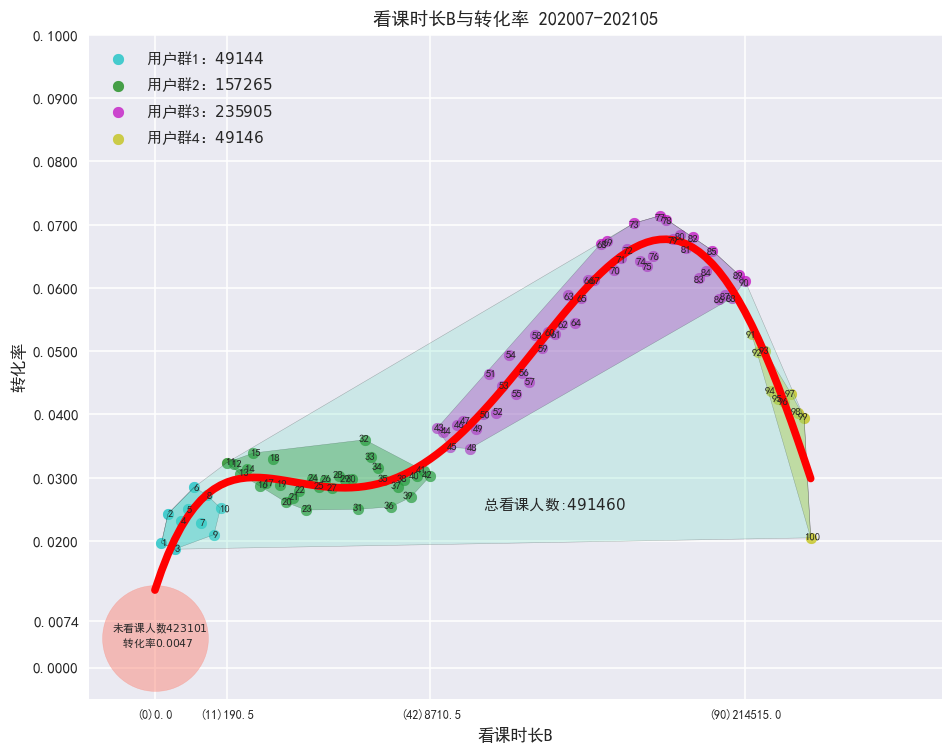

In [31]:
plt.style.use('tableau-colorblind10')
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文,解决图中无法显示中文的问题
plt.rcParams['axes.unicode_minus']=False    #设置显示中文后,负号显示受影响。解决坐标轴上乱码问题
# 群划分
q0,q1, q2, q3 =0, 11, 42, 90
用户群1人数 = sum(dfr[(dfr.序号>q0)&(dfr.序号<q1)]['用户数'])
用户群2人数 = sum(dfr[(dfr.序号>=q1)&(dfr.序号<=q2)]['用户数'])
用户群3人数 = sum(dfr[(dfr.序号>q2)&(dfr.序号<=q3)]['用户数'])
用户群4人数 = sum(dfr[(dfr.序号>q3)]['用户数'])

# 用户群1
x1 = list(a[(a[0]<q1)&(a[0]>q0)][0])
y1 = list(a[(a[0]<q1)&(a[0]>q0)][1])

# 用户群2
x2 = list(a[(a[0]>=q1)&(a[0]<=q2)][0])
y2 = list(a[(a[0]>=q1)&(a[0]<=q2)][1])

# 用户群3
x3 = list(a[(a[0]>q2)&(a[0]<=q3)][0])
y3 = list(a[(a[0]>q2)&(a[0]<=q3)][1])

# 用户群3
x4 = list(a[a[0]>q3][0])
y4 = list(a[a[0]>q3][1])

plt.figure(figsize=(10, 8), dpi=110)

    
plt.scatter(x1, y1, alpha=0.7, color='c', label='用户群1：${}$'.format(用户群1人数));
plt.scatter(x2, y2, alpha=0.7, color='g', label='用户群2：${}$'.format(用户群2人数));
plt.scatter(x3, y3, alpha=0.7, color='m', label='用户群3：${}$'.format(用户群3人数));
plt.scatter(x4, y4, alpha=0.7, color='y', label='用户群4：${}$'.format(用户群4人数));

# 未看课的用户
plt.scatter(a[a[0]==0][0], a[a[0]==0][1], alpha=0.5, color='#FA897B', s=4800)

for i in Larr:
    if i[0]==q0:
        plt.text(-6.5, i[1]*0.7,  "{}".format('未看课人数${}$\n  转化率${}$'.format(dfr[dfr.序号==0]['用户数'].values[0],
                                                                             dfr[dfr.序号==0]['转化率'].values[0])
                                           ),fontsize=7)   
    elif i[0]<q1 :
        plt.text(i[0]*0.98, i[1]*0.98,  "{}".format(i[0]), fontsize=7)   
    elif i[0]<=q2:
        plt.text(i[0]*0.97, i[1]*0.99,  "{}".format(i[0]), fontsize=7)
    elif i[0]<=q3:
        plt.text(i[0]*0.99, i[1]*0.99,  "{}".format(i[0]), fontsize=7)
    else:
        plt.text(i[0]*0.99, i[1]*0.99,  "{}".format(i[0]), fontsize=7)
plt.plot(dfr['序号'], y, c='r',linewidth=5);
plt.xlabel('看课时长B');
plt.ylabel('转化率');
plt.ylim(-0.005, 0.1)
plt.xlim(-10, 120)
plt.title("看课时长B与转化率 202007-202105");
#plt.hlines(y=0.018, xmin=1, xmax=100, linestyles='--', color='y');


plt.xticks([q0, q1, q2, q3],['({}){}'.format(q0 ,dfr[dfr['序号']==q0]['平均看课时长'].values[0]), 
                             '({}){}'.format(q1, dfr[dfr['序号']==q1]['平均看课时长'].values[0]), 
                             '({}){}'.format(q2, dfr[dfr['序号']==q2]['平均看课时长'].values[0]),
                             '({}){}'.format(q3 ,dfr[dfr['序号']==q3]['平均看课时长'].values[0]), 
                            ], fontsize=8);
plt.yticks([0.00, 0.0074, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
# 添加各类的凸包
# 定义绘制凸包的函数
def encircle(x, y, ax=None, **kw):
    if not ax: ax = plt.gca()
    p = np.c_[x, y]  # c_功能类似于zip，是生成拼接起来的数组array
    hull = ConvexHull(p)  # 将数据集输入到ConvexHull()中，自动生凸包对象
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)
    
# 调用凸包函数
encircle(x1, y1,
         ec='k',  # 线条的颜色
         fc='c',  # 多边形的颜色
         alpha=0.4)  # 图像整体的透明度
encircle(x2, y2,
         ec='k',  # 线条的颜色
         fc='g',  # 多边形的颜色
         alpha=0.4)  # 图像整体的透明度
encircle(x3, y3,
         ec='k',  # 线条的颜色
         fc='m',  # 多边形的颜色
         alpha=0.4)  # 图像整体的透明度
encircle(x4, y4,
         ec='k',  # 线条的颜色
         fc='y',  # 多边形的颜色
         alpha=0.4)  # 图像整体的透明度
# encircle(, ,
#          ec='k',  # 线条的颜色
#          fc='#86E3CE',  # 多边形的颜色
#          alpha=0.2)  # 图像整体的透明度


encircle(x1+x2+x3+x4, y1+y2+y3+y4,
         ec='k',  # 线条的颜色
         fc='#86E3CE',  # 多边形的颜色
         alpha=0.3)  # 图像整体的透明度

# 算出总看课人数
plt.text(50, 0.025, "总看课人数:${}$".format(sum([用户群1人数,用户群2人数,用户群3人数,用户群4人数])))



# col_labels = ['用户数']
# row_labels = ['用户群1','用户群2','用户群3', '用户群4', '总看课人数']
# table_vals = [[用户群1人数],[用户群2人数],[用户群3人数], [用户群4人数], [sum([用户群1人数,用户群2人数,用户群3人数,用户群4人数])]]
# row_colors = ['c','g','m','y', '#86E3CE']
# my_table = plt.table(cellText=table_vals, colWidths=[0.1]*3,
#                      rowLabels=row_labels, colLabels=col_labels,
#                      rowColours=row_colors, colColours=['r'],alpha=0.1,
#                      loc='best')


plt.legend(loc=2)
plt.savefig('聚类.jpg', dpi=200);
plt.show();  